# 01_nba_api_test.ipynb

In [1]:
## testscript
## A simple script to fetch and display NBA player stats for the 2023-24 season.
from nba_api.stats.endpoints import leaguedashplayerstats
import pandas as pd

stats = leaguedashplayerstats.LeagueDashPlayerStats(season="2023-24")
df = stats.get_data_frames()[0]
df.head()


,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,TEAM_COUNT
0,1630639,A.J. Lawson,A.J.,1610612742,DAL,23.0,42,27,15,0.643,...,211,148,415,385,192,400,257,38,405,1
1,1631260,AJ Green,AJ,1610612749,MIL,24.0,56,35,21,0.625,...,121,223,375,313,145,369,257,38,343,1
2,1631100,AJ Griffin,AJ,1610612737,ATL,20.0,20,8,12,0.400,...,121,77,519,450,396,480,257,38,469,1
3,203932,Aaron Gordon,Aaron,1610612743,DEN,28.0,73,49,24,0.671,...,520,457,52,93,13,79,54,38,87,1
4,1628988,Aaron Holiday,Aaron,1610612745,HOU,27.0,78,39,39,0.500,...,335,419,238,216,123,243,257,38,233,1


In [2]:
## Get the top 20 PTS players
top_scorers = df.sort_values("PTS", ascending=False).head(20)
top_scorers[["PLAYER_NAME","TEAM_ABBREVIATION","GP","PTS","REB","AST"]]


,PLAYER_NAME,TEAM_ABBREVIATION,GP,PTS,REB,AST
372,Luka Dončić,DAL,70,2370,647,686
501,Shai Gilgeous-Alexander,OKC,75,2254,415,465
184,Giannis Antetokounmpo,MIL,73,2222,841,476
233,Jalen Brunson,NYK,77,2212,278,519
434,Nikola Jokić,DEN,79,2085,976,708
29,Anthony Edwards,MIN,79,2049,430,405
337,Kevin Durant,PHX,75,2032,495,378
268,Jayson Tatum,BOS,74,1987,601,364
125,De'Aaron Fox,SAC,74,1966,340,418
509,Stephen Curry,GSW,74,1956,330,379


In [3]:
## Filter by number of games played and playing time

# Apply filter conditions for analysis
# Number of games: 30 or more
# Average playing time per game: 20 or more minutes


df_filtered = df.copy()

# 'MIN' can be a string like "34:12" or "23.4".
# First convert it to a float to match the current season's specifications.

df_filtered["MIN"] = pd.to_numeric(df_filtered["MIN"], errors="coerce")

df_filtered = df_filtered.query("GP >= 30 and MIN >= 20")

df_filtered[["PLAYER_NAME", "TEAM_ABBREVIATION", "GP", "MIN", "PTS"]].head()

,PLAYER_NAME,TEAM_ABBREVIATION,GP,MIN,PTS
0,A.J. Lawson,DAL,42,310.900000,136
1,AJ Green,MIL,56,614.281667,252
3,Aaron Gordon,DEN,73,2296.810000,1013
4,Aaron Holiday,HOU,78,1269.296667,514
5,Aaron Nesmith,IND,72,1994.655000,877


In [4]:
## Calculate the average score for each team (groupby)

# Average PTS, REB, and AST are calculated for each team

team_stats = (
    df_filtered
    .groupby("TEAM_ABBREVIATION")[["PTS", "REB", "AST"]]
    .mean()
    .round(2)
    .sort_values("PTS", ascending=False)
)

team_stats.head(10)

,PTS,REB,AST
TEAM_ABBREVIATION,,,
MIN,795.00,307.09,188.55
LAL,780.15,273.00,201.85
ATL,776.83,291.58,173.08
IND,775.00,255.08,191.92
DEN,768.67,297.50,196.17
BOS,762.62,291.92,172.00
NYK,754.92,298.54,160.69
HOU,749.92,290.33,165.17
PHX,740.77,282.15,177.15


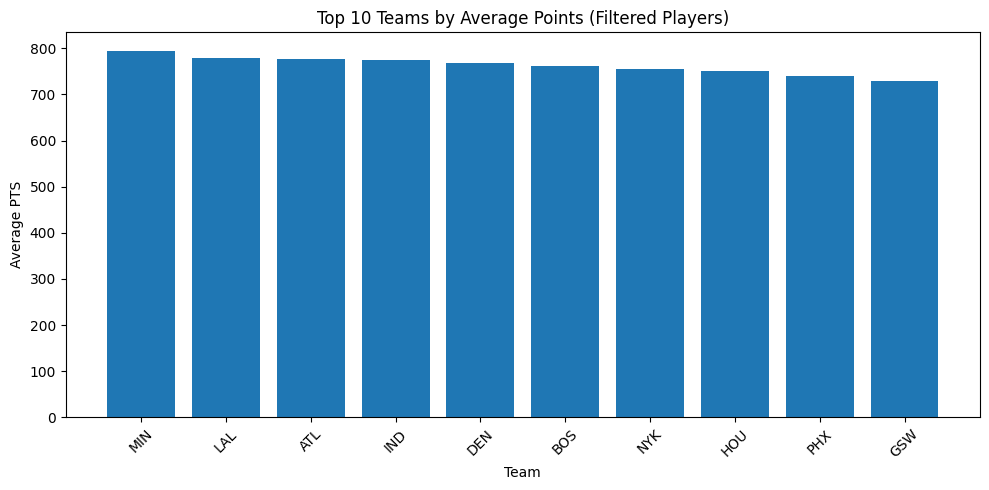

In [5]:
## Bar graph of the top 10 teams
import matplotlib.pyplot as plt

top_teams = team_stats.head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_teams.index, top_teams["PTS"])
plt.title("Top 10 Teams by Average Points (Filtered Players)")
plt.xlabel("Team")
plt.ylabel("Average PTS")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
